Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9736842105263158

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9736263736263737
Cross-validation scores: [0.97368421 0.9561

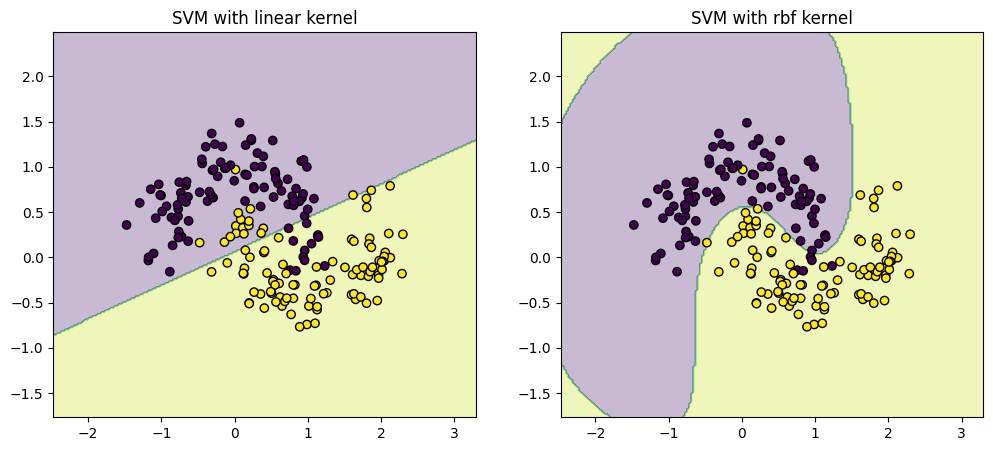

In [2]:
# @title Default title text
# Support Vector Machines Project
# Task 7 - AI & ML Internship

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load Dataset (Breast Cancer)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# 3. Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

# 4. Hyperparameter Tuning (C, gamma)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 5. Cross-validation Score
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

# 6. Visualization with 2D dataset (for decision boundaries)
X_vis, y_vis = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

plt.figure(figsize=(12,5))

for i, kernel in enumerate(['linear', 'rbf']):
    model = SVC(kernel=kernel, C=1, gamma='scale')
    model.fit(X_vis, y_vis)

    # Plot decision boundary
    plt.subplot(1, 2, i+1)
    x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
    y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, edgecolors='k')
    plt.title(f"SVM with {kernel} kernel")

plt.show()
